<a href="https://colab.research.google.com/github/salonirohil/Task1-Data-Science-Internship/blob/main/task2_Data_science_Internship_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')



In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:

# Drop rows with missing values
df_clean = df.dropna()

In [ ]:
df_clean.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:

# Convert 'Votes' to numeric (remove commas and convert to int)
df_clean['Votes'] = df_clean['Votes'].str.replace(',', '').astype(int)

<ipython-input-5-53fca15b7a73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Votes'] = df_clean['Votes'].str.replace(',', '').astype(int)


In [ ]:
# Select features and target variable
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']
target = 'Rating'

X = df_clean[features]
y = df_clean[target]

In [ ]:
# One-hot encode categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a pipeline with preprocessing and regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [ ]:
print(f'RMSE: {rmse}')

RMSE: 1.206240995594599


**This approach allows you to explore various data preprocessing and machine learning techniques to build a model that predicts movie ratings based on features like genre, director, and actors. The use of pipelines ensures that preprocessing steps are correctly applied to both training and testing data. The RMSE metric provides a way to evaluate the model's performance.**

<ipython-input-14-6d92a1880db3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN


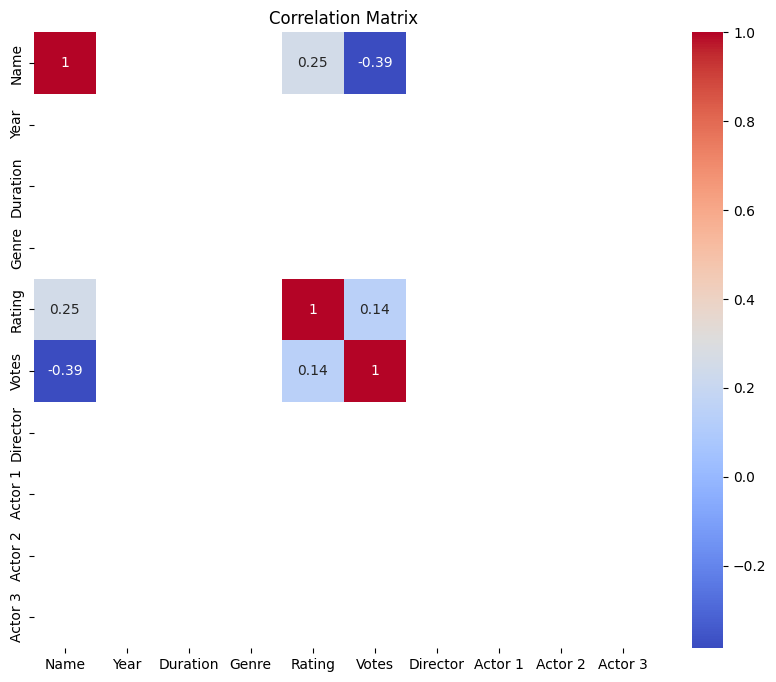

In [ ]:
# Convert relevant columns to numeric, handling errors
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN
        except:
            pass  # Skip columns that cannot be converted

# Import the necessary library
import matplotlib.pyplot as plt
import seaborn as sns # Assuming you want to use seaborn as well

# Now calculate the correlation matrix
corr_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Convert relevant columns to numeric, handling errors
for col in ['Rating', 'Votes']:  # Specify the columns to convert
    if df_clean[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN
        except:
            pass  # Skip columns that cannot be converted

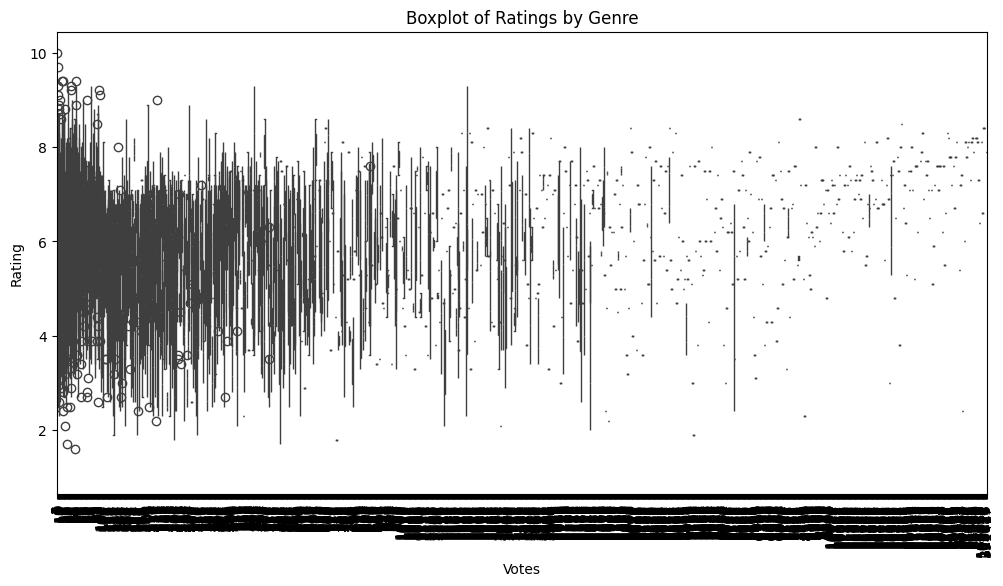

In [ ]:
# Boxplot of Ratings by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Votes', y='Rating', data=df_clean)  # Now this should work with numeric 'Rating'
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings by Genre')
plt.show()